<div>
    <img src="https://www.universitylanguageschool.com/wp-content/uploads/2017/04/wdlwordle2.jpg" width="800">
</div>

# Why Is English So Difficult?

If you've ever tried learning a language, you have no doubt hit a wall and become frustrated at how difficult it can be to retain, understand, and utilize what you've learned. For native English speakers, the hardest languages to learn are Arabic, Japanase, Korean, and Mandarin Chinese. However, if you were born in a non-English speaking country, you might think that English is the hardest language to learn. [Why](https://wordcounter.net/blog/2017/01/05/102792_english-hardest-language.html) would that be? According to [Babbel.com](https://www.babbel.com/en/magazine/the-10-most-spoken-languages-in-the-world), English is the third most spoken language with roughly **370+ million** native speakers. The #1 and #2 positions would go to Chinese (**1.3 billion**) and Spanish (**471 million**), respectively. According to [Ethnologue](https://www.ethnologue.com/), English is the language with the largest number of second language speakers, with over **1.08 billion**! That's roughly 4x more than the next highest language!

<figure>
    <img src="https://i.imgur.com/LKTXzEZ.png">
    <figcaption align = "center">Fig.1 - List of First & Second Language Speakers</figcaption>
</figure>

And yet English, given its long [history](https://www.psychologytoday.com/us/blog/language-in-the-mind/201702/why-english-is-such-difficult-language-learn), is often stated as being one of the most [confusing](https://owlcation.com/humanities/Examples-Of-Why-The-English-Language-Is-So-Confusing), [non-sensical](https://reword.ca/5-examples-of-how-the-english-language-makes-no-sense-at-all/) languages in the world. I have some experience in this field, as I was an English teacher in South Korea for 6 years. I have taught everything from kindergartners to high-schoolers, and I have heard every complaint and frustration imaginable. I know my adult Korean friends also express a certain level of disdain when it comes to learning English because to them it simply makes [no](https://thelanguagedoctors.org/is-english-hard-to-learn/#:~:text=The%20English%20language%20is%20widely,both%20learners%20and%20native%20speakers.) [sense](https://www.vox.com/2015/7/21/9003299/spelling-reform).

I want to know what areas of English learners struggle with the most. To do that, I will be digging into the [English Stack Exchange](https://english.stackexchange.com/) website to query its database and analyze the results. I hope to gain some insights on what kinds of areas are asked about the most.

## Project Goals
* Query database and gather data
* Clean, refine, and organize data
* Analyze data to find most common trouble areas
* Investigate if there are any unique patterns or correlations
* Incorporate any third-party information
* Create helpful visualizations

# Initial Exploration of the English Stack Exchange

By navigating to the home of the English Stack Exchange we can get familiar with its structure.

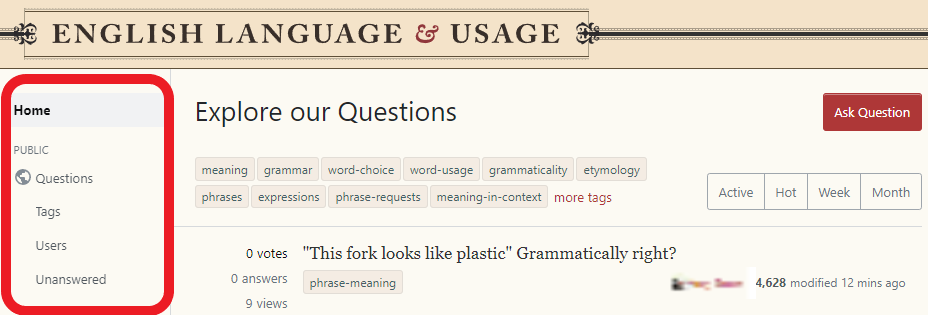

We can see on the far left that there are dedicated sections for Questions, Tags, Users, and Unanswered questions. On every Stack Exchange site users can "tag" their posts with a relevant tag, so that others can find it easier. This will be very helpful in our project. You can have a limit of 5 tags per post, so it encourages people to think about the essence of their question, instead of spamming every tag on every post. We can easily see a sample of tags from the image: meaning, grammar, phrases, etc. If we click on the Tags button on the left, it takes us to a page with more in-depth explanation of each tag.

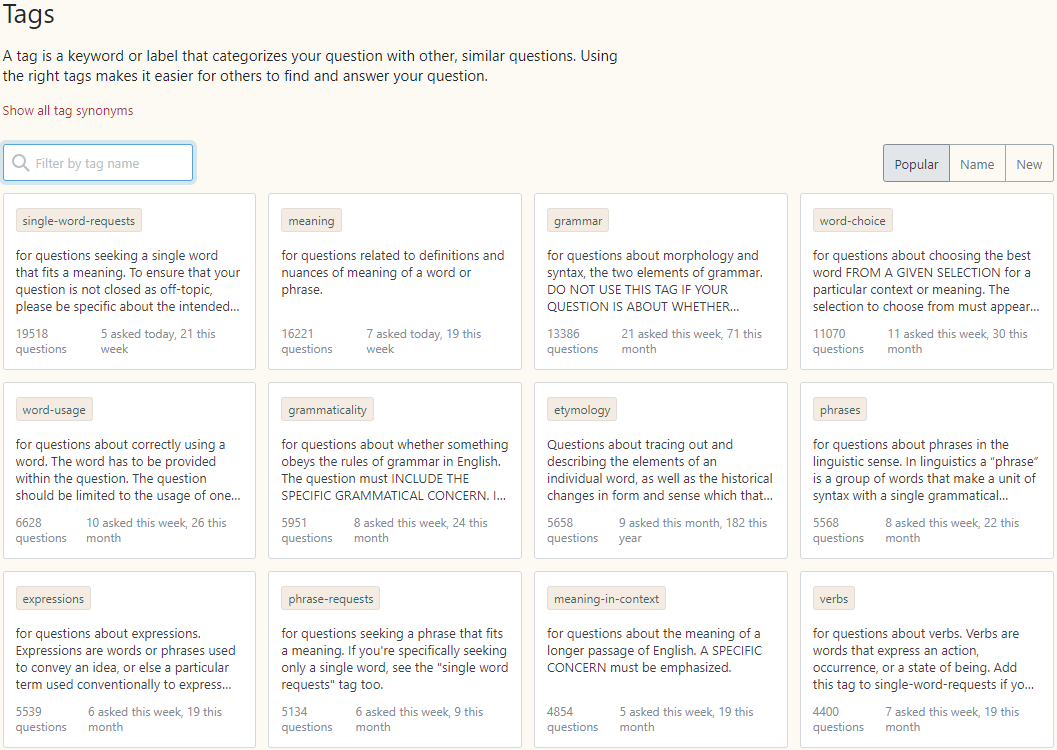

This is a fantastic resource for us, as we'll be using it extensively. Every Stack Exchange website provides a [public data base](https://data.stackexchange.com/english/query/new) that users can query via SQL commands. We can even save the query results to a .csv file, and import them as a pandas DataFrame for use with our project.

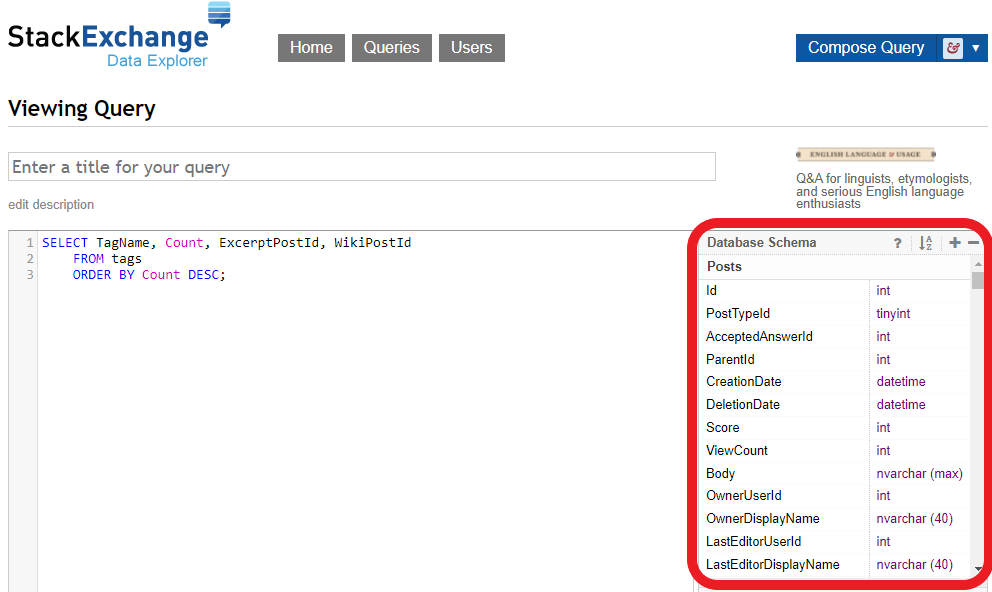

Above is what the query page looks like. On the right, we can see a detailed schema of how the database is laid out, as well as the datatype for each attribute. We can see all kinds of relevant information that we can query for Posts, Comments, Users - basically everything we could ever need from this site. If we run the following SQL query, we will get back all the information from `tags` (the following is just a snippet of all the tags).

```
  SELECT *
    FROM tags
ORDER BY Count DESC;
```
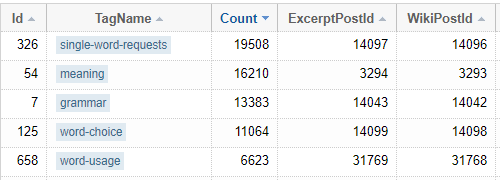

We can clearly see the `TagName` and `Count` values, which will be immensely helpful for us. We can also see that `single-word-requests` is the most used tag, followed by `meaning`, and `grammar`. So right away we can see that definitions of words/phrases, and grammar are the most common areas that people are asking about. If we run the following query, we can see information on the `PostTypes`:

```
SELECT *
  FROM PostTypes;
```

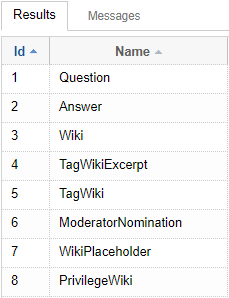

So we can see that there are eight types of Posts. The first two are obvious, but the remaining six aren't especially clear - let's keep digging. If we look at the database schema under `Posts` we can see that it contains a lot of relevant, useful information to us:

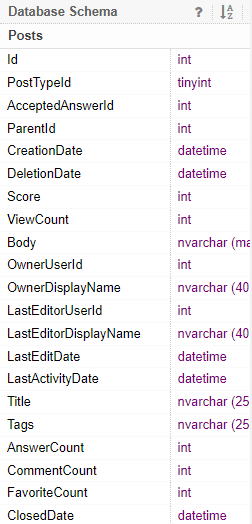

We can clearly see from the above that each post made on the StackExchange contains the following information:

* `Id` - a unique identifier for each post.
* `PostTypeId` - an identification number for the type of post.
* `CreationDate` - the time of creation of the post.
* `Score` - the score (or upvotes) of the post.
* `ViewCount` - how many times the post was viewed.
* `Tags` - the relevant tags that were used for the question.
* `AnswerCount` - how many answers the question received (only for question posts)
* `FavoriteCount` - how many times the question was favored (only for question posts)

Since we have seen that there are eight different types of posts, lets go ahead and see how many of them there are by running the following query:

```
SELECT PostTypeId,
       COUNT(*) as Num_posts
  FROM Posts
 GROUP BY PostTypeId;
```

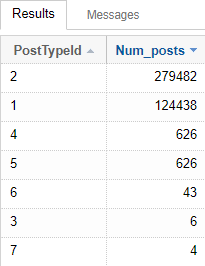

We know from our earlier query that an ID of 1 = `Question`, and an ID of 2 = `Answer`. Interestingly, there are more than twice as many `Answers` as there are `Questions`. Since we really only care about these two types of `Posts`, the others are inconsequential.

Finally, we want to keep our data relatively recent (at the time of writing it is March 2022), so we can do one more query against the StackExchange to find all the relevant information from the past year (March 2021 - March 2022).

```
SELECT Id,
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM Posts
  WHERE PostTypeId = 1 AND CreationDate BETWEEN '3/17/2021' AND '3/17/2022'
 ORDER BY CreationDate;
 ```
 
 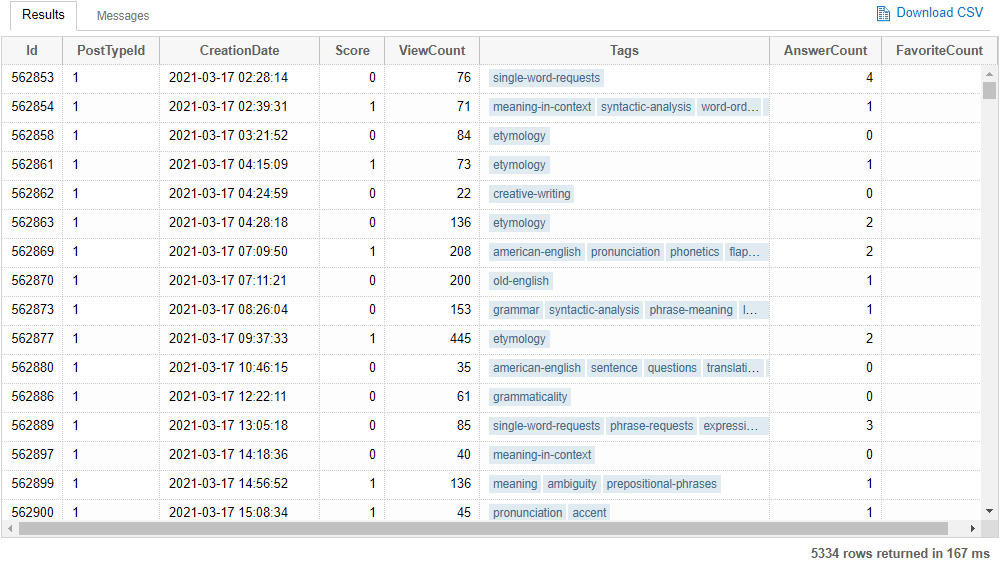
 
 This gives us a dataset of 5,300+ questions to analyze. We can download the query result as a .csv and import it using pandas.
 
 # Import Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Initial Data Exploration

In [2]:
data = pd.read_csv('QueryResults.csv', parse_dates=["CreationDate"])
data.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,562853,1,2021-03-17 02:28:14,0,76,<single-word-requests>,4,NaN
1,562854,1,2021-03-17 02:39:31,1,71,<meaning-in-context><syntactic-analysis><word-...,1,NaN
2,562858,1,2021-03-17 03:21:52,0,84,<etymology>,0,NaN
3,562861,1,2021-03-17 04:15:09,1,73,<etymology>,1,NaN
4,562862,1,2021-03-17 04:24:59,0,22,<creative-writing>,0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5334 non-null   int64         
 1   PostTypeId     5334 non-null   int64         
 2   CreationDate   5334 non-null   datetime64[ns]
 3   Score          5334 non-null   int64         
 4   ViewCount      5334 non-null   int64         
 5   Tags           5334 non-null   object        
 6   AnswerCount    5334 non-null   int64         
 7   FavoriteCount  772 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 333.5+ KB


# Data Cleaning
## Missing Values
From the above we can quickly see that our `FavoriteCount` column has a lot of null values. We only have 772 values for that column, which is **~14.4%** of the total data for that column. `FavoriteCount` simply represents the number of times another user "favorited" that question, signifying that they thought it was particularly helpful, useful, etc. A missing value for this column simply means no users "favorited" the post, so instead of removing all those rows, we can instead replace the missing values with zeros.

In [4]:
#fill in missing values with a zero
data.fillna(0, inplace=True)

#change data type to int64
data["FavoriteCount"] = data["FavoriteCount"].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5334 non-null   int64         
 1   PostTypeId     5334 non-null   int64         
 2   CreationDate   5334 non-null   datetime64[ns]
 3   Score          5334 non-null   int64         
 4   ViewCount      5334 non-null   int64         
 5   Tags           5334 non-null   object        
 6   AnswerCount    5334 non-null   int64         
 7   FavoriteCount  5334 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 333.5+ KB


## Removing Redundant Information

Since our initial query specified that we only want PostTypeId to be 1, we can go ahead and remove that column from our data, as it no longer serves a purpose.

In [5]:
data.drop('PostTypeId', axis=1, inplace=True)

## Cleaning "Tags" Column

In [6]:
#shows us the data type of each tag
data["Tags"].apply(lambda t: type(t)).value_counts()

<class 'str'>    5334
Name: Tags, dtype: int64

We can see that each value in the column is a string. On Stack Exchange, each post can have a maximum of five tags. We could have five separate columns for each tag, but let's leave the structure alone for now. Instead, let's clean up the strings to make them easier to read.

In [7]:
data['Tags'].head(10)

0                               <single-word-requests>
1    <meaning-in-context><syntactic-analysis><word-...
2                                          <etymology>
3                                          <etymology>
4                                   <creative-writing>
5                                          <etymology>
6    <american-english><pronunciation><phonetics><f...
7                                        <old-english>
8    <grammar><syntactic-analysis><phrase-meaning><...
9                                          <etymology>
Name: Tags, dtype: object

We need to remove the angled brackets (<>) and put a space between each tag. The [str.replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) and [str.split()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) methods will do the trick.

In [8]:
data['Tags'] = data['Tags'].str.replace(r'^<|>$','', regex=True).str.split('><')
data['Tags'].head(10)

0                               [single-word-requests]
1    [meaning-in-context, syntactic-analysis, word-...
2                                          [etymology]
3                                          [etymology]
4                                   [creative-writing]
5                                          [etymology]
6    [american-english, pronunciation, phonetics, f...
7                                        [old-english]
8    [grammar, syntactic-analysis, phrase-meaning, ...
9                                          [etymology]
Name: Tags, dtype: object

# Data Analysis
## Tag Counts

Now that they're cleaned up a bit, let's count how many times each tag was used. We can create a dictionary where the key is the tag, and the value is the number of times it was used.

In [9]:
tag_count = {}

#iterate through each tag in the list, for each row
for row in data["Tags"]:
    for tags in row:
        if tags in tag_count:
            tag_count[tags] += 1
        else:
            tag_count[tags] = 1

#converts the dictionary into a dataframe
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0:"Count"}, inplace=True)

#sorts by "Count" and displays top 20
most_used = tag_count.sort_values("Count",ascending=False).head(20)
most_used

,Count
single-word-requests,823
grammar,822
meaning,586
word-choice,318
word-usage,284
grammaticality,240
meaning-in-context,229
phrases,209
expressions,205
phrase-requests,196


In [74]:
def plot_dist(data, x_data, title='', subtitle=''):
    #figure setup
    fig = plt.figure(figsize=(15,8))
    
    #margin setup for titles & signature
    t_margin  = data[x_data].max()*-0.15
    st_margin = data[x_data].max()*-0.17
    
    #plot
    ax = sns.barplot(data=data, x=x_data, y=data.index, palette='flare')
    
    #vertical line
    ax.axvline(x=0, color='black', linewidth=10, alpha=.7)
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)

    #title & subtitle
    ax.text(x=t_margin, y=-2.5, s=title, fontsize=28, weight='bold', alpha=.75)
    ax.text(x=t_margin, y=-1.4, s=subtitle, fontsize=21, alpha=.85)
    
    #signature bar
    ax.text(x=st_margin, y=21,
            s=' ©NoahGampe' + ' '*170 + ' Source: English Stack Exchange',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')
    
    plt.show()

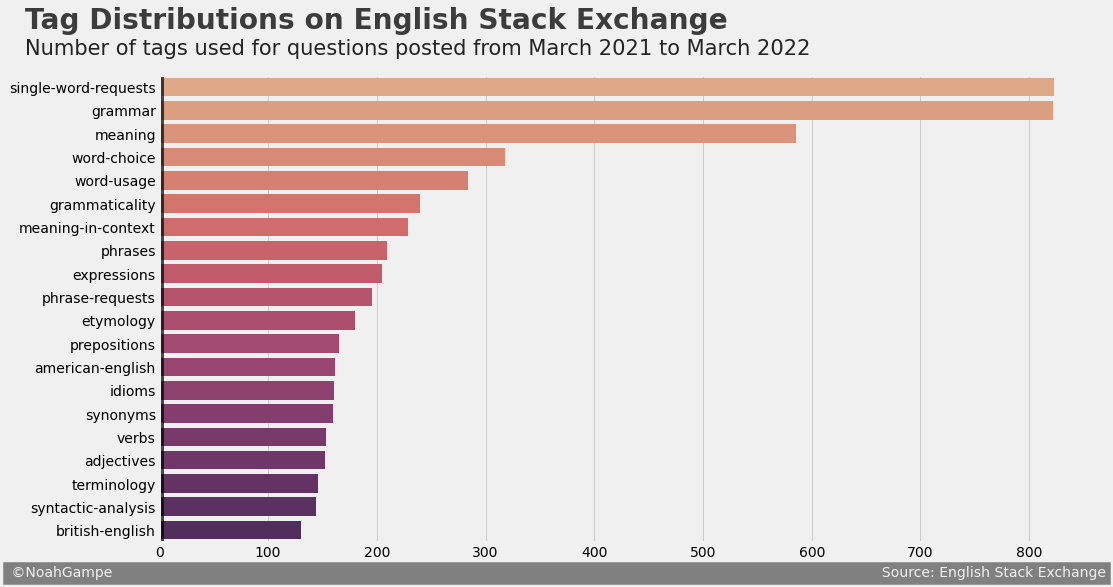

In [75]:
title = 'Tag Distributions on English Stack Exchange'
subtitle = 'Number of tags used for questions posted from March 2021 to March 2022'
plot_dist(most_used, 'Count', title, subtitle)

## Tag Views

We can see that the two most often used tags are `single-word-requests` and `grammar` - arguably two areas of English that are more than confusing for learners. Also, some of the tags may seem a little redundant. For example, `meaning` and `meaning-in-context` both pertain to what a word or phrase means. Similarly, `grammar` and `grammaticality` would both focus on grammar. Before we dig into that issue further, let's repeat this same process based on ViewCount instead.

In [27]:
tag_views = {}

for index, row in data.iterrows():
    for tag in row["Tags"]:
        if tag in tag_views:
            tag_views[tag] += row["ViewCount"]
        else:
            tag_views[tag] = row["ViewCount"]

#converts tag_views dictionary into dataframe
tag_views = pd.DataFrame.from_dict(tag_views, orient="index")
tag_views.rename(columns={0:"Views"}, inplace=True)

#sorts by "Count" and displays top 20
most_viewed = tag_views.sort_values("Views",ascending=False).head(20)
most_viewed

,Views
single-word-requests,265433
meaning,141274
phrase-requests,89825
grammar,89192
idioms,87717
etymology,86071
expressions,59578
idiom-requests,55343
american-english,54637
word-choice,50120


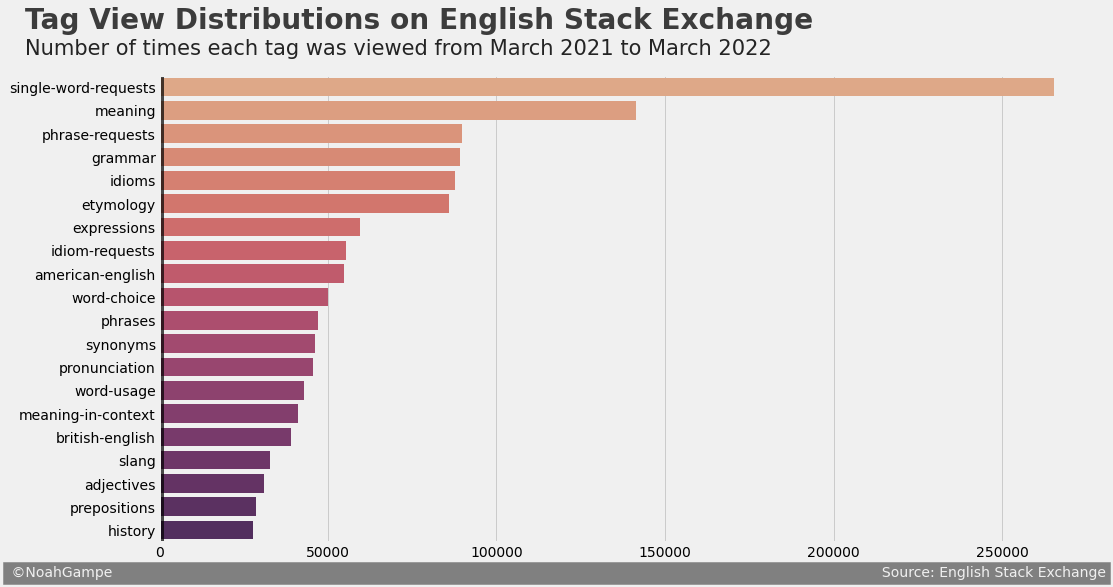

In [71]:
title = 'Tag View Distributions on English Stack Exchange'
subtitle = 'Number of times each tag was viewed from March 2021 to March 2022'
plot_dist(most_viewed, 'Views', title, subtitle)

We can clearly see that `single-word-requests` has roughly **265,000** views, almost double that of the next highest-viewed tag, `meaning`. This is rather insightful, as it implies that a lot of people are simply seeking a single word that fits a meaning. That is a very common encounter when it comes to learning languages, one that I've asked many times about the Korean language, so it would definitely make sense that it happens with English as well.

In [72]:
#merge most_used with most_viewed, on most_used
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,Views
single-word-requests,823,265433.0
grammar,822,89192.0
meaning,586,141274.0
word-choice,318,50120.0
word-usage,284,43035.0
grammaticality,240,NaN
meaning-in-context,229,41111.0
phrases,209,46957.0
expressions,205,59578.0
phrase-requests,196,89825.0


In [73]:
#merge most_used with most_viewed, on most_used
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,Views
single-word-requests,823.0,265433
meaning,586.0,141274
phrase-requests,196.0,89825
grammar,822.0,89192
idioms,161.0,87717
etymology,180.0,86071
expressions,205.0,59578
idiom-requests,NaN,55343
american-english,162.0,54637
word-choice,318.0,50120
